# Local Binary Patterns

http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.local_binary_pattern  
http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_local_binary_pattern.html 

In [1]:
%matplotlib inline

In [58]:
import numpy as np
import cv2 
import matplotlib
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, color, exposure
import skimage.feature as ft
import scipy.ndimage as nd
from scipy.stats import itemfreq

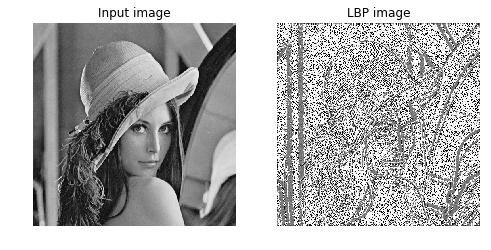

In [59]:
img = cv2.imread("./images/lena.png")
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# settings for LBP
METHOD = 'uniform'
P = 16
R = 2
lbp_image = ft.local_binary_pattern(image, P, R, METHOD)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
  
ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
  
ax2.axis('off')
ax2.imshow(lbp_image, cmap=plt.cm.gray)
ax2.set_title('LBP image')
plt.show()

In [60]:
brick = data.load('brick.png')
grass = data.load('grass.png')
wall = data.load('rough-wall.png')
refs = {
    'brick': ft.local_binary_pattern(brick, P, R, METHOD),
    'grass': ft.local_binary_pattern(grass, P, R, METHOD),
    'wall': ft.local_binary_pattern(wall, P, R, METHOD)
}

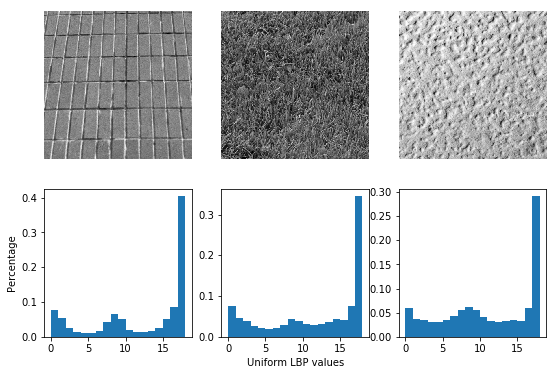

In [61]:
# plot histograms of LBP of textures
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3,
                                                       figsize=(9, 6))
plt.gray()

ax1.imshow(brick)
ax1.axis('off')
ax4.hist(refs['brick'].ravel(), normed=True, bins=P + 2, range=(0, P + 2))
ax4.set_ylabel('Percentage')

ax2.imshow(grass)
ax2.axis('off')
ax5.hist(refs['grass'].ravel(), normed=True, bins=P + 2, range=(0, P + 2))
ax5.set_xlabel('Uniform LBP values')

ax3.imshow(wall)
ax3.axis('off')
ax6.hist(refs['wall'].ravel(), normed=True, bins=P + 2, range=(0, P + 2))

plt.show()

In [151]:
freq = {
    'brick': itemfreq(refs['brick'].ravel()),
    'grass': itemfreq(refs['grass'].ravel()),
    'wall': itemfreq(refs['wall'].ravel())
}

hists = {
    'brick': (freq['brick']/sum(freq['brick'])),
    'grass': (freq['grass']/sum(freq['grass'])),
    'wall': (freq['wall']/sum(freq['wall']))
}

img = cv2.imread("./images/brick.jpg")
img = cv2.imread("./images/wall.jpg")

image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
image = data.load('grass.png') #nd.rotate(data.load('grass.png'), angle=0, reshape=False)

lbp = ft.local_binary_pattern(image, P, R, METHOD)
lbpFreq = itemfreq(lbp.ravel())
lbpHist = lbpFreq/sum(lbpFreq)

#https://docs.opencv.org/3.1.0/d6/dc7/group__imgproc__hist.html
score1 = cv2.compareHist(np.array(lbpHist, dtype=np.float32), np.array(hists['brick'], dtype=np.float32), cv2.HISTCMP_CHISQR)
score2 = cv2.compareHist(np.array(lbpHist, dtype=np.float32), np.array(hists['grass'], dtype=np.float32), cv2.HISTCMP_CHISQR)
score3 = cv2.compareHist(np.array(lbpHist, dtype=np.float32), np.array(hists['wall'], dtype=np.float32), cv2.HISTCMP_CHISQR)

print(score1,score2,score3)
    

0.09090442734524364 0.0 0.09879813369922708


In [63]:
brick.shape

(512, 512)

In [ ]:



# settings for LBP
METHOD = 'uniform'
P = 16
R = 2
matplotlib.rcParams['font.size'] = 9


def kullback_leibler_divergence(p, q):
    p = np.asarray(p)
    q = np.asarray(q)
    filt = np.logical_and(p != 0, q != 0)
    return np.sum(p[filt] * np.log2(p[filt] / q[filt]))


def match(refs, img):
    best_score = 10
    best_name = None
    lbp = ft.local_binary_pattern(img, P, R, METHOD)
    hist, _ = np.histogram(lbp, normed=True, bins=P + 2, range=(0, P + 2))
    for name, ref in refs.items():
        ref_hist, _ = np.histogram(ref, normed=True, bins=P + 2,
                                   range=(0, P + 2))
        score = kullback_leibler_divergence(hist, ref_hist)
        if score < best_score:
            best_score = score
            best_name = name
    return best_name


brick = data.load('brick.png')
grass = data.load('grass.png')
wall = data.load('rough-wall.png')

refs = {
    'brick': ft.local_binary_pattern(brick, P, R, METHOD),
    'grass': ft.local_binary_pattern(grass, P, R, METHOD),
    'wall': ft.local_binary_pattern(wall, P, R, METHOD)
}

# classify rotated textures
print ('Rotated images matched against references using LBP:')
print ('original: brick, rotated: 30deg, match result:',)
print (match(refs, nd.rotate(brick, angle=30, reshape=False)))
print ('original: brick, rotated: 70deg, match result:',)
print( match(refs, nd.rotate(brick, angle=70, reshape=False)))
print ('original: grass, rotated: 145deg, match result:',)
print (match(refs, nd.rotate(grass, angle=145, reshape=False)))

# plot histograms of LBP of textures
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3,
                                                       figsize=(9, 6))
plt.gray()

ax1.imshow(brick)
ax1.axis('off')
ax4.hist(refs['brick'].ravel(), normed=True, bins=P + 2, range=(0, P + 2))
ax4.set_ylabel('Percentage')

ax2.imshow(grass)
ax2.axis('off')
ax5.hist(refs['grass'].ravel(), normed=True, bins=P + 2, range=(0, P + 2))
ax5.set_xlabel('Uniform LBP values')

ax3.imshow(wall)
ax3.axis('off')
ax6.hist(refs['wall'].ravel(), normed=True, bins=P + 2, range=(0, P + 2))

plt.show()

In [ ]:
# settings for LBP
METHOD = 'uniform'
P = 16
R = 2
a = ft.local_binary_pattern(brick, P, R, METHOD)
print(a.shape)

lbp = ft.local_binary_pattern(brick, 8, 2, METHOD)
print(lbp.shape)

from scipy.stats import itemfreq

x = itemfreq(lbp.ravel())

print(x)

In [ ]:
brick = data.load('brick.png')
grass = data.load('grass.png')
wall = data.load('rough-wall.png')




In [ ]:
lbp = ft.local_binary_pattern(img, 16, 2, METHOD)
print( lbp.shape)
print( itemfreq(lbp.ravel()) )
plt.imshow(lbp, "gray") 
plt.show()